In [1]:
get_ipython().system('pip install google-cloud-bigquery')
get_ipython().system('pip install google-cloud-bigquery[pandas]')

zsh:1: no matches found: google-cloud-bigquery[pandas]


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
import os
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

CONFIGURE THE BIGQUERY SETTINGS

In [4]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [5]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_training.weather_data`
"""

In [6]:
# QUERY THE DATA ONCE
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data['date']= pd.to_datetime(data['date'])
data.head()

,date,max_rel_humidity,max_temperature,mean_temperature,min_rel_humidity,min_temperature,potential_water_deficit,precipitation_data,wind_speed
0,2019-09-04,99.9498,25.4570,18.6242,56.4720,11.7913,-3.6142,0.0,3.6461
1,2020-02-16,84.4966,8.6228,3.1896,40.7666,-2.2436,-1.4307,0.0,2.2398
2,2019-12-19,95.9017,2.8886,-3.4884,39.0330,-9.8654,-0.9389,0.0,4.1230
3,2020-02-20,70.0359,0.7939,-4.0254,34.7544,-8.8446,-1.4427,0.0,4.8531
4,2019-12-23,97.1634,13.8411,5.7818,31.2553,-2.2774,-1.2787,0.0,2.3404


In [7]:
X = data.drop("wind_speed",1)   #Feature Matrix
X = data.drop("date",1)
y = data["wind_speed"]          #Target Variable

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14158/3613689375.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop("wind_speed",1)   #Feature Matrix
/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14158/3613689375.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop("date",1)


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14158/3188068582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


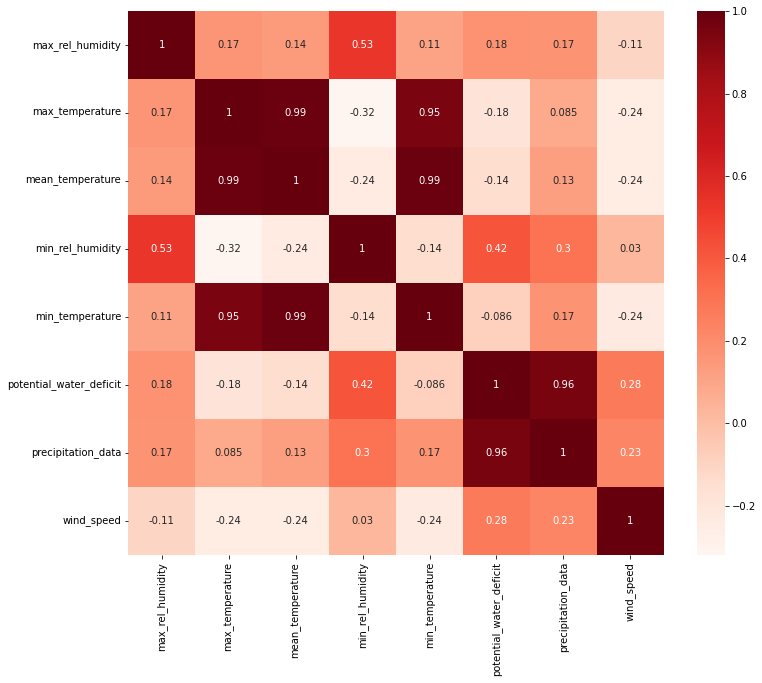

In [8]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
#Correlation with output variable
cor_target = abs(cor["potential_water_deficit"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)

potential_water_deficit    1.000000
precipitation_data         0.956646
Name: potential_water_deficit, dtype: float64


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

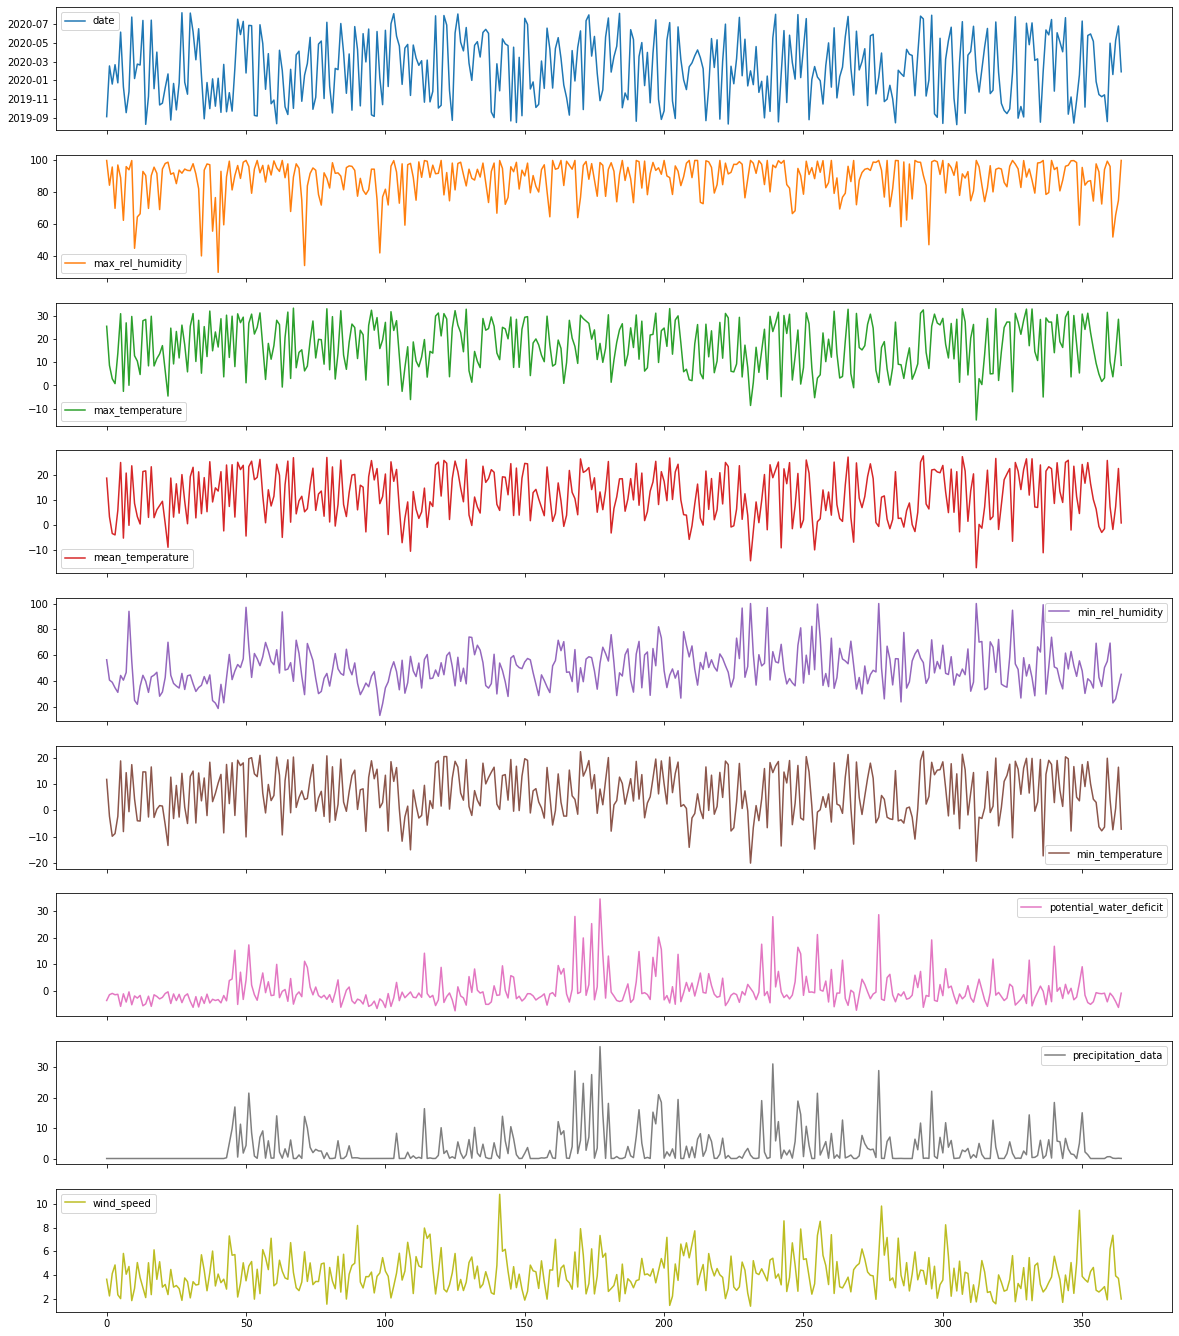

In [10]:
data.plot(subplots=True, figsize=(20,24))

In [11]:
min(data['date']),max(data['date'])

(Timestamp('2019-08-09 00:00:00'), Timestamp('2020-08-07 00:00:00'))

In [12]:
data.dtypes

date                       datetime64[ns]
max_rel_humidity                  float64
max_temperature                   float64
mean_temperature                  float64
min_rel_humidity                  float64
min_temperature                   float64
potential_water_deficit           float64
precipitation_data                float64
wind_speed                        float64
dtype: object

In [13]:
data = data.set_index('date')

In [14]:
data.index

DatetimeIndex(['2019-09-04', '2020-02-16', '2019-12-19', '2020-02-20',
               '2019-12-23', '2020-06-05', '2019-12-10', '2019-09-17',
               '2019-11-24', '2020-07-24',
               ...
               '2019-12-27', '2019-11-15', '2019-11-08', '2019-11-14',
               '2019-08-19', '2020-04-30', '2020-01-19', '2020-05-09',
               '2020-06-25', '2020-01-28'],
              dtype='datetime64[ns]', name='date', length=365, freq=None)

In [15]:
data['Year'] = data.index.year
data['Month'] = data.index.month
# Display a random sampling of 5 rows
data.sample(5, random_state=0)

,max_rel_humidity,max_temperature,mean_temperature,min_rel_humidity,min_temperature,potential_water_deficit,precipitation_data,wind_speed,Year,Month
date,,,,,,,,,,
2019-12-18,97.8910,-2.5306,-7.1461,56.1076,-11.7615,-0.4629,0.0022,3.5746,2019,12
2020-05-01,86.1188,19.9006,13.0803,35.6753,6.2600,-4.1807,0.0788,3.1970,2020,5
2019-09-22,81.5481,29.8013,23.9777,41.1183,18.1541,4.4834,9.7817,5.6722,2019,9
2019-12-22,93.9565,11.8324,4.6358,34.5712,-2.5607,-1.2796,0.0000,2.8557,2019,12
2019-11-02,92.2644,9.1528,3.4183,42.0694,-2.3161,-1.6305,0.0105,5.0141,2019,11


In [16]:
data.loc['2019-08']

,max_rel_humidity,max_temperature,mean_temperature,min_rel_humidity,min_temperature,potential_water_deficit,precipitation_data,wind_speed,Year,Month
date,,,,,,,,,,
2019-08-10,90.5813,28.3985,21.5126,39.8397,14.6268,-4.8887,0.0000,2.1004,2019,8
2019-08-24,91.3571,24.6652,18.6607,44.4712,12.6562,-4.7381,0.0000,4.4706,2019,8
2019-08-28,93.9562,25.3146,18.8246,43.4746,12.3346,-4.7147,0.0000,4.3852,2019,8
2019-08-12,95.4054,28.0463,24.1730,64.2389,20.2998,9.9964,14.0146,3.3058,2019,8
2019-08-23,98.3627,24.6563,18.4608,51.2616,12.2653,-3.4338,0.5794,4.1893,2019,8
2019-08-21,96.0526,29.4368,24.4074,57.8442,19.3779,5.7482,10.4608,2.8198,2019,8
2019-08-16,98.8423,28.4663,22.6356,52.5434,16.8048,-2.9397,1.2605,2.9367,2019,8
2019-08-20,99.9874,30.3163,24.4875,60.9037,18.6587,3.4321,7.2278,3.5280,2019,8
2019-08-26,91.3474,23.5543,21.1979,73.4626,18.8415,15.6467,18.4548,5.3918,2019,8


In [17]:
sns.set(rc={'figure.figsize':(11, 4)})

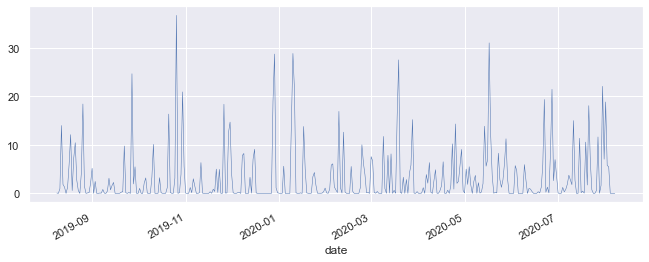

In [18]:
data['precipitation_data'].plot(linewidth=0.5);

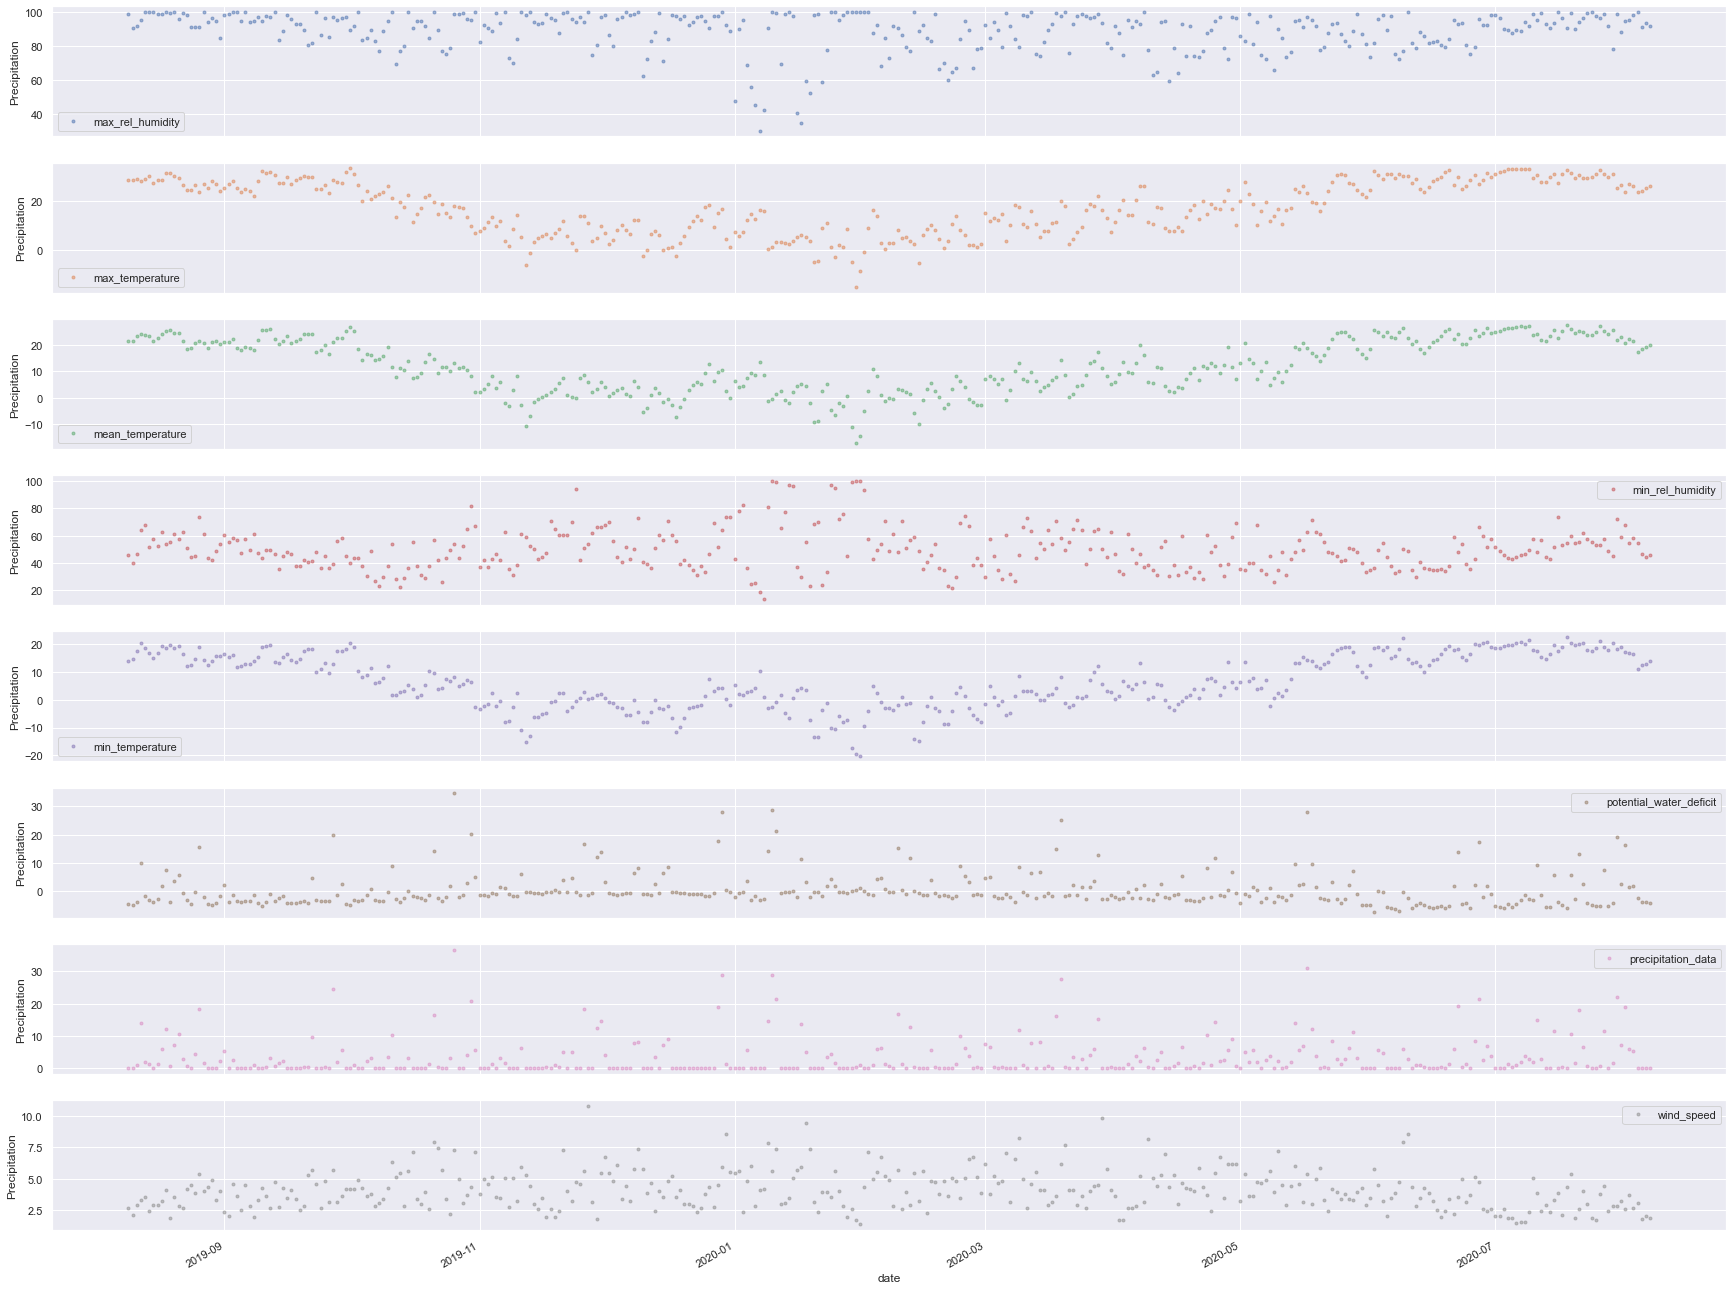

In [19]:
cols_plot = ['max_rel_humidity','max_temperature','mean_temperature','min_rel_humidity','min_temperature','potential_water_deficit','precipitation_data','wind_speed']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(30, 25), subplots=True)
for ax in axes:
    ax.set_ylabel('Precipitation')

/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_14158/2539290912.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax.plot(data.loc['2019-08':'2019-12', 'precipitation_data'], marker='o', linestyle='-')


Text(0.5, 1.0, 'Aug 2019-2020 Precipiation Data')

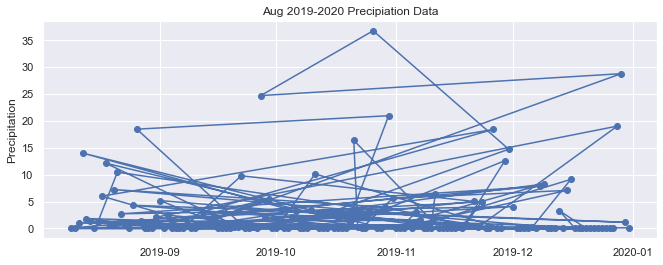

In [20]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(data.loc['2019-08':'2019-12', 'precipitation_data'], marker='o', linestyle='-')
ax.set_ylabel('Precipitation')
ax.set_title('Aug 2019-2020 Precipiation Data')

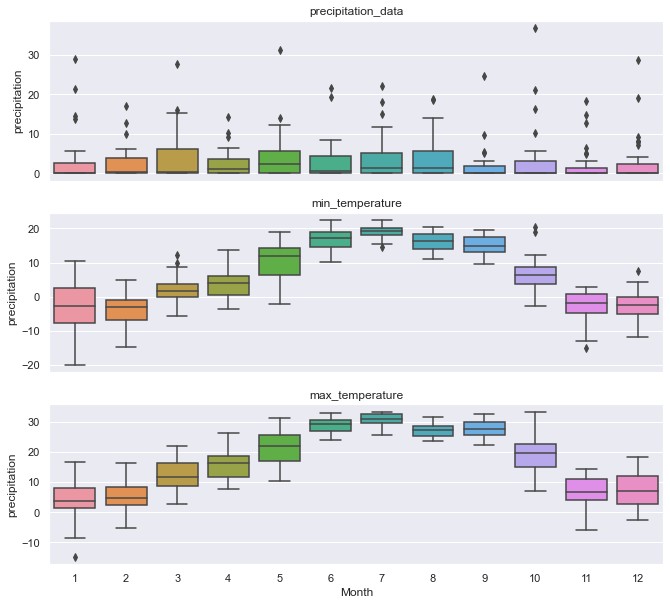

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['precipitation_data', 'min_temperature', 'max_temperature'], axes):
    sns.boxplot(data=data, x='Month', y=name, ax=ax)
    ax.set_ylabel('precipitation')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

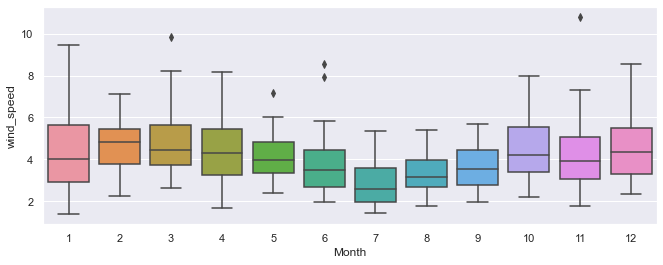

In [22]:
sns.boxplot(data=data, x='Month', y='wind_speed');

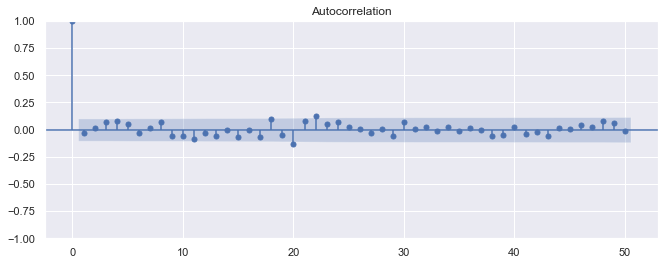

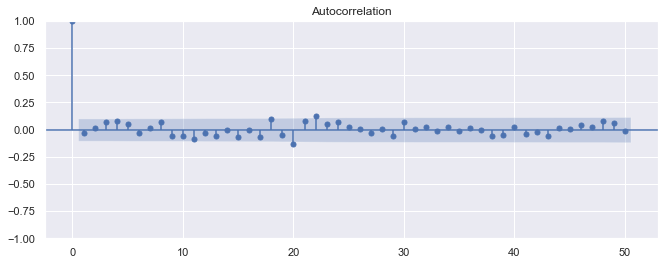

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x=data['max_temperature'], lags=50)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [25]:
y_pred = pd.Series(model.predict(X), index=X.index)

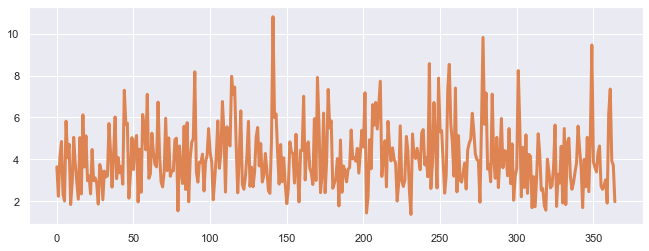

In [26]:
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)

In [27]:
lag_1 = data['precipitation_data'].shift(1)

In [28]:
data['lag_1']=lag_1